In [130]:
import numpy
import pandas as pd
import numpy as np
from math import ceil
import matplotlib.pyplot as plt

In [99]:
fullevent_data = pd.read_csv("./2020_Problem_D_DATA/fullevents.csv")

In [100]:
pfed = fullevent_data.loc[:, ['MatchID', 'TeamID', 'MatchPeriod', 'EventTime', 'EventType', 'EventSubType']]
pfed = pfed[pfed['MatchID']==1][pfed['TeamID'].isin(['Huskies'])]

In [101]:
pfed = pfed.reset_index()
pfed = pfed.loc[:, ['MatchID', 'TeamID', 'MatchPeriod', 'EventTime', 'EventType', 'EventSubType']]

In [102]:
last_1H = max(pfed[pfed['MatchPeriod']=='1H'].EventTime)

fed_2H = pfed[pfed['MatchPeriod']=='2H']
fed_2H['EventTime'] += last_1H

pfed = pd.concat([pfed[pfed['MatchPeriod']=='1H'], fed_2H])

In [103]:
pfed

,MatchID,TeamID,MatchPeriod,EventTime,EventType,EventSubType
0,1,Huskies,1H,31.174681,Free Kick,Goal kick
1,1,Huskies,1H,33.812965,Duel,Air duel
2,1,Huskies,1H,46.323501,Pass,Head pass
3,1,Huskies,1H,47.004714,Duel,Ground loose ball duel
4,1,Huskies,1H,49.880983,Pass,Head pass
...,...,...,...,...,...,...
859,1,Huskies,2H,5673.356852,Duel,Air duel
860,1,Huskies,2H,5674.589033,Duel,Air duel
861,1,Huskies,2H,5674.743291,Duel,Ground loose ball duel
862,1,Huskies,2H,5678.232719,Duel,Ground loose ball duel


In [104]:
points = [0]

In [105]:
points.append(min(pfed[pfed['MatchPeriod']=='2H'].index))

In [106]:
sindex = list(pfed[pfed['EventType']=='Substitution'].index)

for p in sindex:
    points.append(p)

In [107]:
points.append(max(pfed.index))

In [108]:
points = list(set(points))
points = sorted(points)

In [109]:
points

[0, 438, 446, 578, 739, 863]

In [117]:
time_points = []

In [118]:
for i in range(len(points)-1):
    start_time = pfed.iloc[points[i]].EventTime
    end_time = pfed.iloc[points[i+1]].EventTime
    print(start_time, end_time)
    # time_points.append(start_time)

    duration = end_time - start_time
    num_points = ceil(duration / 360)
    if num_points <= 0:
        continue
    sub_quantum = duration / num_points

    while start_time < end_time:
        time_points.append(start_time)
        start_time += sub_quantum

time_points.append(pfed.iloc[points[-1]].EventTime)

31.174680999999996 2788.82438
2788.82438 2847.208955
2847.208955 3687.208955
3687.208955 4707.208955
4707.208955 5722.153692


In [119]:
time_points

[31.174680999999996,
 375.880893375,
 720.5871057500001,
 1065.293318125,
 1409.9995305,
 1754.705742875,
 2099.41195525,
 2444.1181676250003,
 2788.82438,
 2847.208955,
 3127.208955,
 3407.208955,
 3687.208955,
 4027.208955,
 4367.208955,
 4707.208955,
 5045.523867333333,
 5383.838779666667,
 5722.153692]

In [124]:
set(pfed[pfed.EventTime >= time_points[0]][pfed.EventTime < time_points[1]].EventType)

{'Duel',
 'Foul',
 'Free Kick',
 'Goalkeeper leaving line',
 'Others on the ball',
 'Pass'}

In [126]:
num_types = []

for i in range(len(time_points)-1):
    start_time = time_points[i]
    end_time = time_points[i+1]
    if i == len(time_points)-2:
        end_time += 360

    sub_fed = pfed[pfed.EventTime >= start_time][pfed.EventTime < end_time]
    types_set = set(sub_fed.EventType) | set(sub_fed.EventSubType)
    num_types.append(len(types_set))

In [129]:
num_type_avg = np.mean(num_types)

In [132]:
points_avg = [num_type_avg] * len(num_types)

Text(0, 0.5, 'Number of types')

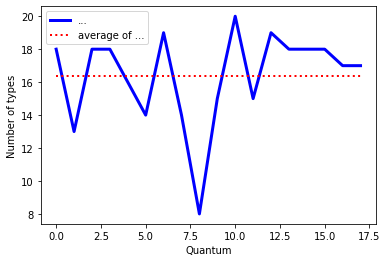

In [142]:
plt.plot(num_types, color='b', linewidth=3, label='...')
plt.plot(points_avg, color='r', linewidth=2, linestyle=':', label='average of ...')
plt.legend(loc=2)
plt.xlabel('Quantum')
plt.ylabel('Number of types')